In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('ap-northeast-1.csv', parse_dates=True, header = None )
df.columns = ['time', 'instance', 'system', 'data_center', 'price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957000 entries, 0 to 1956999
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   time         object 
 1   instance     object 
 2   system       object 
 3   data_center  object 
 4   price        float64
dtypes: float64(1), object(4)
memory usage: 74.7+ MB


In [3]:
df.isnull().sum()

time           0
instance       0
system         0
data_center    0
price          0
dtype: int64

In [4]:
df['time']=pd.to_datetime(df.time).dt.date

In [5]:
df.set_index(['time'], inplace=True)

In [6]:
df.head()

,instance,system,data_center,price
time,,,,
2017-05-08,c3.8xlarge,Windows,ap-northeast-1a,1.6503
2017-05-08,c3.8xlarge,Windows,ap-northeast-1c,1.7461
2017-05-08,i3.large,SUSE Linux,ap-northeast-1c,0.1223
2017-05-08,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
2017-05-08,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1957000 entries, 2017-05-08 to 2017-03-30
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   instance     object 
 1   system       object 
 2   data_center  object 
 3   price        float64
dtypes: float64(1), object(3)
memory usage: 74.7+ MB


In [16]:
# отфильтруем датасет  по OС и видам архитектур, в соответствии с заданием
df_filter = df[(df.system == 'Windows') &(df['instance'].str.startswith('i'))]

# При необходимости отсортируем
df_filter = df_filter.sort_index()
df_filter

,instance,system,data_center,price
time,,,,
2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2157
2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,2.0510
2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2159
2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,1.8010
2017-03-30,i2.8xlarge,Windows,ap-northeast-1a,1.7529
...,...,...,...,...
2017-05-08,i3.large,Windows,ap-northeast-1c,0.1112
2017-05-08,i3.large,Windows,ap-northeast-1c,0.1115
2017-05-08,i3.large,Windows,ap-northeast-1c,0.1113


In [13]:
df_filter['instance'].unique()

array(['i2.xlarge', 'i3.xlarge', 'i2.4xlarge', 'i2.2xlarge',
       'i3.16xlarge', 'i3.2xlarge', 'i3.4xlarge', 'i3.large',
       'i2.8xlarge', 'i3.8xlarge'], dtype=object)

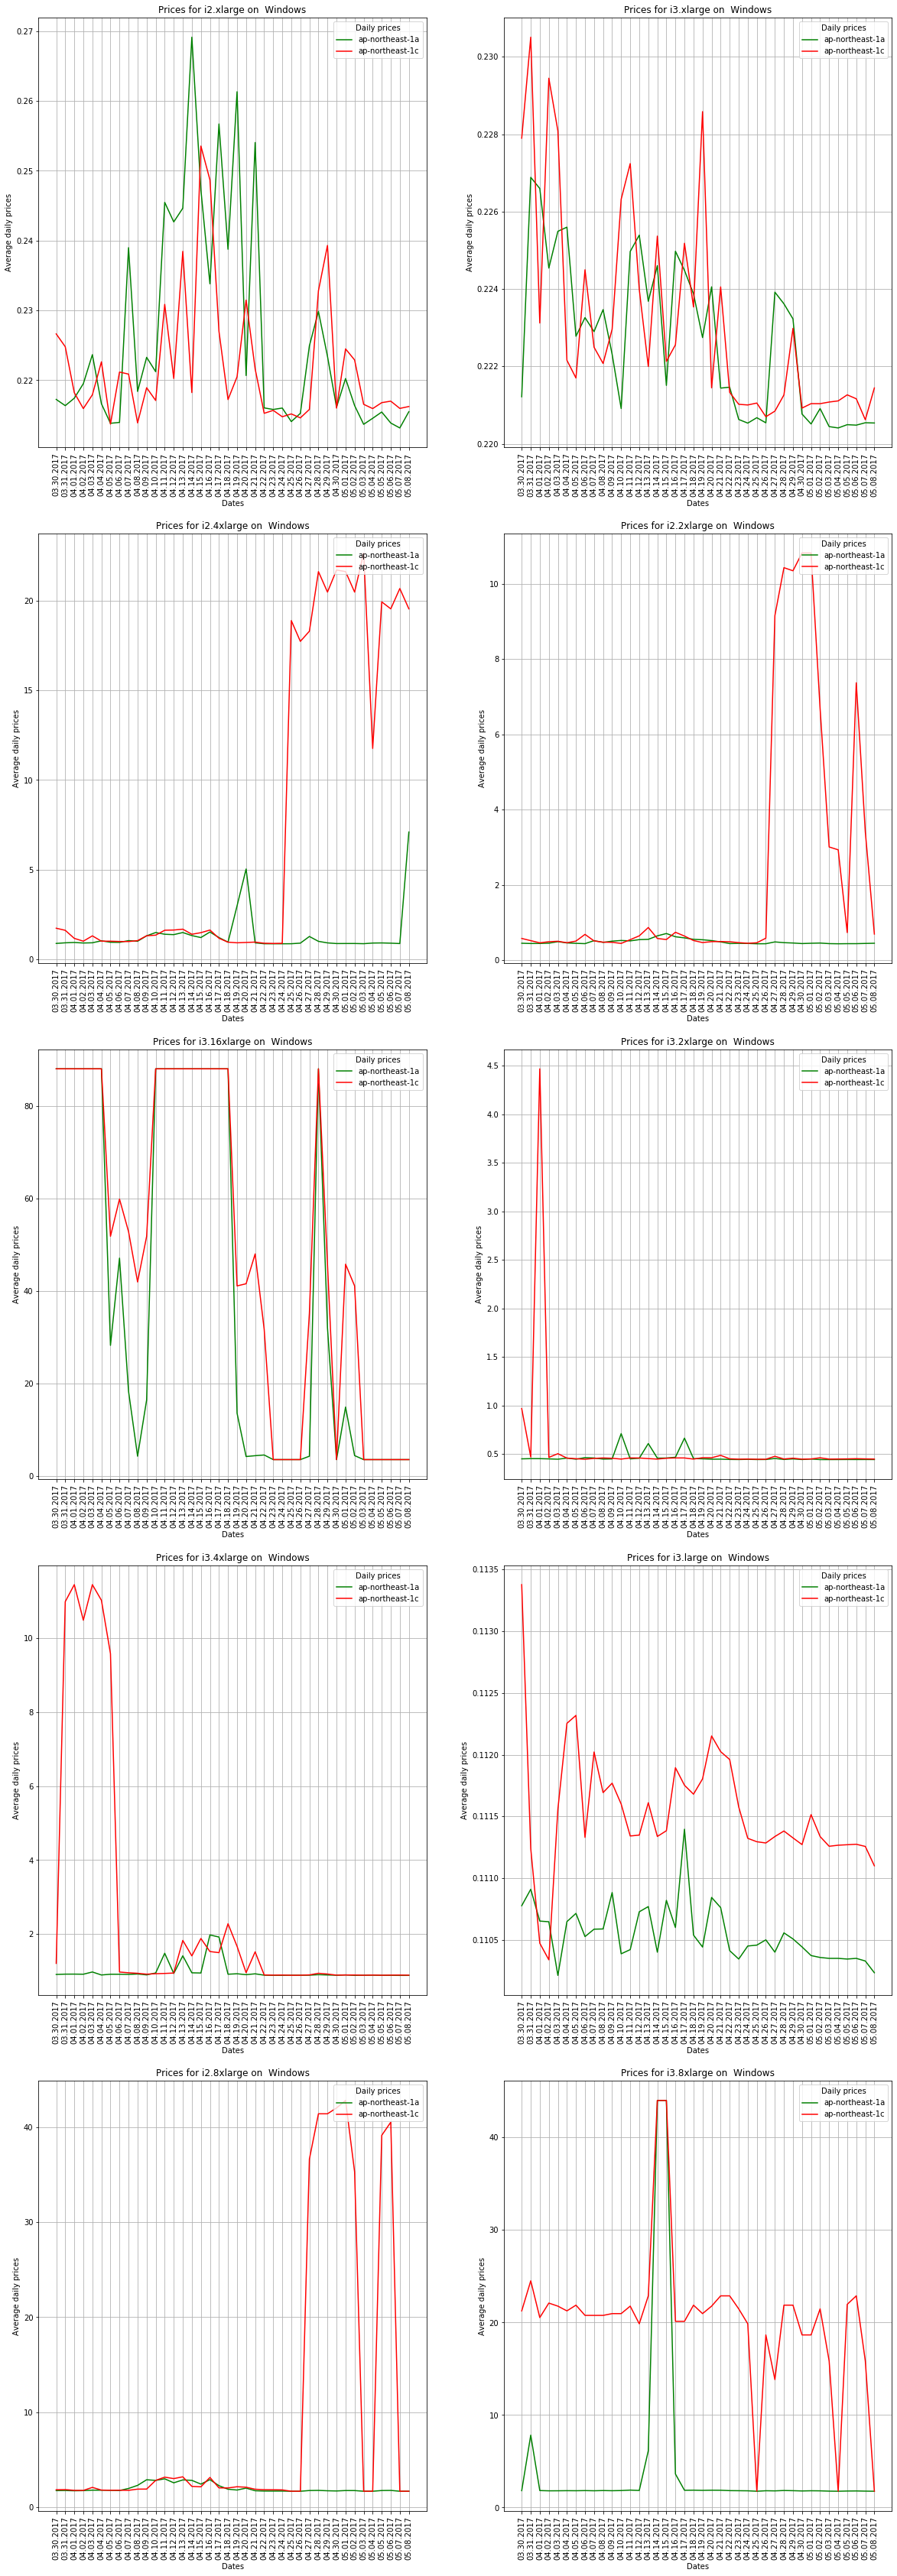

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(20,60))
dates = pd.date_range(start=df_filter.index.min(), end=df_filter.index.max())
i=0
for row in range(axes.shape[0]):
    for column in range(axes.shape[1]):
        # выборка по каждому из instance и data_center
        instance = df_filter['instance'].unique()[i]
        arxs_data_a = df_filter[(df_filter['instance'] == instance) & (df_filter['data_center'] == 'ap-northeast-1a')]
        arxs_data_c = df_filter[(df_filter['instance'] == instance) & (df_filter['data_center'] == 'ap-northeast-1c')]
        # находим среднее значение цены в день
        arxs_data_c = arxs_data_c.groupby (['time']).price.mean()
        arxs_data_a = arxs_data_a.groupby (['time']).price.mean()
        # график средней дневной цены 
        axes[row, column].plot(arxs_data_a, label='ap-northeast-1a', color='g')
        axes[row, column].plot(arxs_data_c, label='ap-northeast-1c', color='r')
        # заголовки
        axes[row, column].set_title('Prices for {} on  Windows'.format(instance))
        axes[row, column].set_xlabel('Dates')
        axes[row, column].set_ylabel('Average daily prices')
        # метки
        axes[row, column].set_xticks(dates)
        axes[row, column].set_xticklabels([pd.to_datetime(str(date)).strftime("%m.%d.%Y") for date in dates], rotation=90)
        # сетка
        axes[row, column].grid()
        # легенда
        axes[row, column].legend(loc='upper right', title='Daily prices')
        i+=1
plt.show()